In [505]:
import scipy.io.wavfile, scipy.signal, sounddevice
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib import cm
from matplotlib.ticker import ScalarFormatter

plt.rcParams["figure.dpi"] = 120

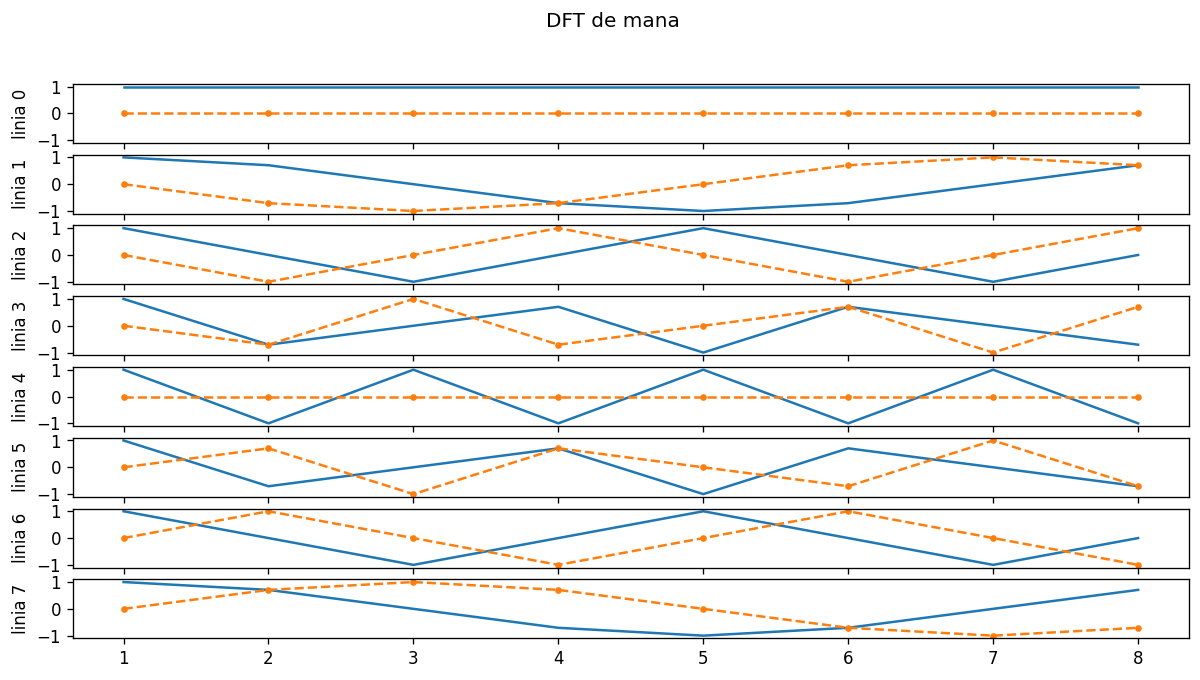

In [506]:
# 1
N = 8
F = np.zeros((N, N), dtype=np.complex_)
for index in range(N):
    for j in range(N):
        F[index][j] = np.power(np.e, -2 * np.pi * 1j * index * j / N)
        # omega = np.exp( - 2 * np.pi * 1J / N )
        # F[i][j] = np.power( omega, i * j ) / N

fig, axs = plt.subplots(N, figsize=(12, 6), sharex=True, sharey=True)
fig.suptitle("DFT de mana")

for index in range(N):
    axs[index].plot([j + 1 for j in range(8)], F[index].real)
    axs[index].plot([j + 1 for j in range(8)], F[index].imag, ".--")
    axs[index].set_ylabel(f"linia {index}")

In [507]:
dftmtx = scipy.linalg.dft(N)
# fig, axs = plt.subplots(N)
# fig.suptitle("DFT verificare")

# for i in range(N):
#     axs[i].plot([j+1 for j in range(8)], dftmtx[i].real)
#     axs[i].plot([j+1 for j in range(8)], dftmtx[i].imag, ".--")
#     axs[i].set_ylabel(f"linia {i}")


print("Test allclose: ", np.allclose(F, dftmtx))


def is_unitary(m):
    Hmat = m.dot(m.T.conj()) / len(m)
    res = np.allclose(np.eye(len(m)), Hmat)
    print(Hmat[0:2][0:2])
    return res


print("Test unitara: ", is_unitary(F))

Test allclose:  True
[[ 1.00000000e+00+0.00000000e+00j -6.93889390e-17-2.77555756e-17j
  -5.35782975e-17+5.55111512e-17j -2.77555756e-17-1.11022302e-16j
   0.00000000e+00+6.12323400e-17j -2.63677968e-16+1.52655666e-16j
  -3.66621044e-16+8.32667268e-17j  4.44089210e-16-1.38777878e-16j]
 [-6.93889390e-17+2.77555756e-17j  1.00000000e+00+0.00000000e+00j
  -4.19845767e-17+3.74778596e-18j  1.97656345e-16+4.41699975e-17j
  -1.14854779e-17+4.73545521e-17j -3.90967293e-17-6.16680431e-17j
   9.63542302e-18-2.23763755e-16j  2.22044605e-16-1.55192300e-16j]]
Test unitara:  True


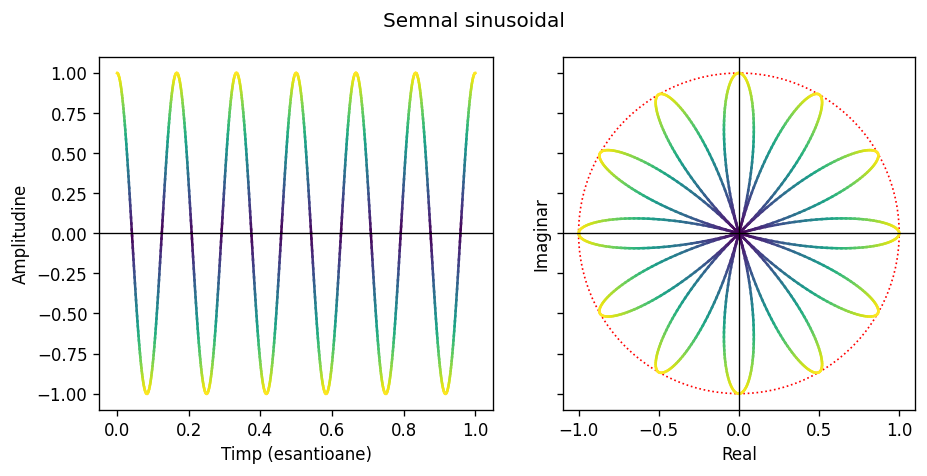

In [508]:
# 2
t = np.linspace(0, 1, 1000)
omega = 6
semnal = np.sin(2 * np.pi * omega * t + np.pi / 2)

fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle("Semnal sinusoidal")
colormap = plt.get_cmap("viridis")


def plot_multicolor(ax, datax, datay, dist, colormap, x_label, y_label):
    distances = np.abs(dist)
    norm = plt.Normalize(vmin=distances.min(), vmax=distances.max())

    for k in range(len(distances) - 1):
        segment_color = colormap(norm(distances[k]))
        ax.plot(
            [datax[k], datax[k + 1]],
            [datay[k], datay[k + 1]],
            color=segment_color,
        )
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.axhline(0, color="black", linewidth=0.8)


plot_multicolor(axs[0], t, semnal, semnal, colormap, "Timp (esantioane)", "Amplitudine")

formula = semnal * np.exp(-2 * np.pi * 1j * t)
plot_multicolor(
    axs[1], np.real(formula), np.imag(formula), formula, colormap, "Real", "Imaginar"
)

# Add the unit circle
unit_circle = plt.Circle((0, 0), 1, fill=False, color="red", linestyle="dotted")
axs[1].add_patch(unit_circle)
axs[1].set_aspect("equal", "box")
axs[1].axvline(0, color="black", linewidth=0.8)


plt.tight_layout()

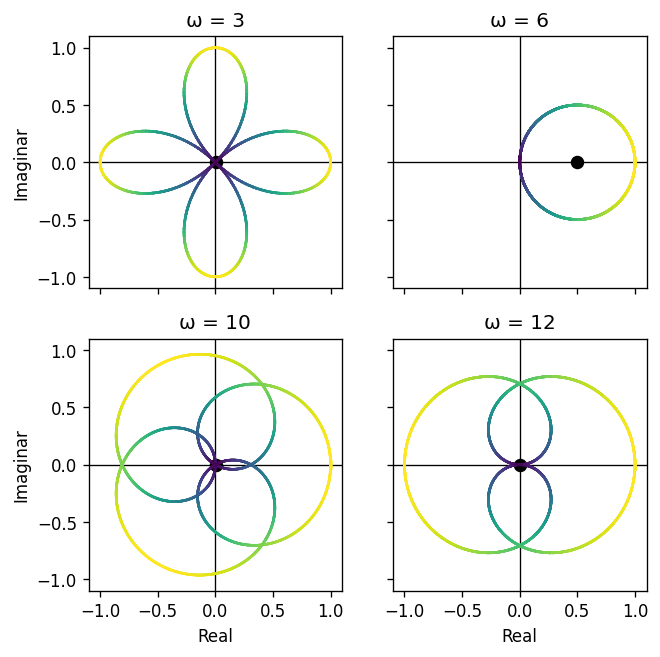

In [509]:
num_rows = 2
fig, axs = plt.subplots(num_rows, num_rows, figsize=(6, 6), sharex=True, sharey=True)
omegas = [3, 6, 10, 12]

for index, ax in enumerate(axs.flat):
    omega = omegas[index]
    formula = semnal * np.exp(-2 * np.pi * omega * 1j * t)

    center = np.mean(formula)  # nu cred ca e bine dar nu stiu cum sa fac

    ax.scatter(np.real(center), np.imag(center), marker="o", color="black", s=50)
    ax.axhline(0, color="black", linewidth=0.8)
    ax.axvline(0, color="black", linewidth=0.8)

    distances = np.abs(formula)
    norm = plt.Normalize(vmin=distances.min(), vmax=distances.max())

    colormap = plt.get_cmap("viridis")

    for k in range(len(distances) - 1):
        segment_color = colormap(norm(distances[k]))
        ax.plot(
            [np.real(formula[k]), np.real(formula[k + 1])],
            [np.imag(formula[k]), np.imag(formula[k + 1])],
            color=segment_color,
        )

    ax.set_title(f"ω = {omega}")
    ax.set_xlabel("Real")
    ax.set_ylabel("Imaginar")
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])

for ax in axs.flat:
    ax.label_outer()

plt.show()

158.0 Hz
226.0 Hz
420.0 Hz


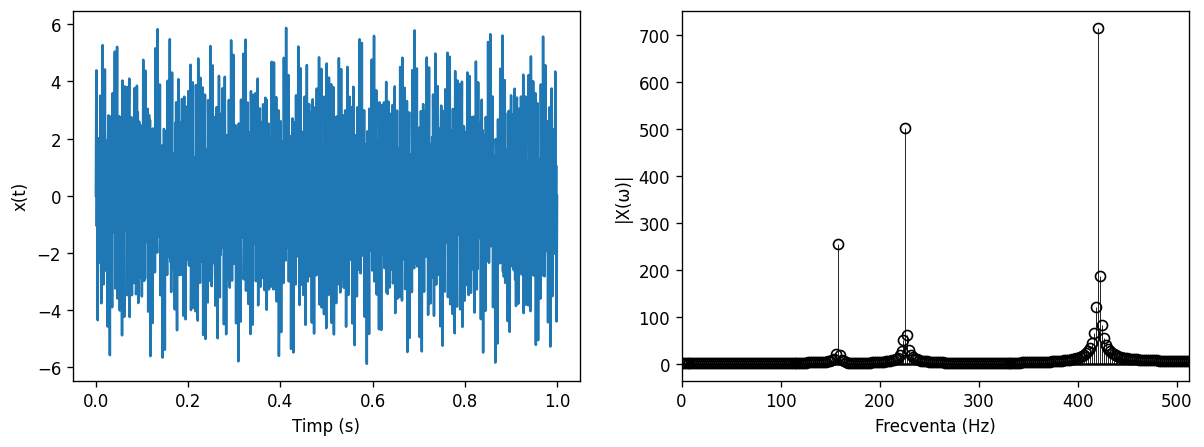

In [510]:
# 3
sample_rate = 1024
dft_points = 512
t = np.linspace(0, 1, sample_rate)

semnal = []
it_freq = [79, 113, 210]
for i in range(3):
    freq = sample_rate / dft_points * it_freq[i]
    print(freq, "Hz")
    amp = i + 1
    semnal.append(amp * np.sin(2 * np.pi * freq * t))


semnal_compus = sum(semnal)

X = np.zeros(dft_points, dtype=np.complex_)
for omega in range(dft_points):
    for n in range(dft_points):
        X[omega] += semnal_compus[n] * np.exp(-2 * np.pi * 1j * omega * n / dft_points)


fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(t, semnal_compus)
axs[0].set_xlabel("Timp (s)")
axs[0].set_ylabel("x(t)")


freq = [i * sample_rate / dft_points for i in range(dft_points)]
markerline, stemlines, baseline = axs[1].stem(
    freq, np.abs(X), linefmt="k-", markerfmt="ko"
)
markerline.set_markerfacecolor("none")
stemlines.set_linewidth(0.5)
baseline.set_color("k")
axs[1].set_xlabel("Frecventa (Hz)")
axs[1].set_ylabel("|X(ω)|")
axs[1].set_xlim([0, dft_points])

plt.show()